# Devoir 2 pour IFT6390 - Fondements de l'apprentissage machine

### Par Olivier Malenfant-Thuot
Matricule: 1012818

## Question 1: Linear and non-linear regularized regression

### 1.1 Linear Regression

1.1.1 L'ensemble des paramètres $\theta$ du modèle de régression linéaire sont $\vec{\text{w}} \in {\rm I\!R^d}$ et $b \in {\rm I\!R}$. 

1.1.2 Le risque empirique pour un training set $D$, évalué à partir de la fonction de perte $L((x,t),f)$ prend la forme

\begin{equation}
    \hat{R}(f,D) = \sum\limits_{(x,t) \in D}(f(x) - t)^2 = \sum\limits_{(x,t) \in D} (\vec{\text{w}}^T \vec{x} + b - t)^2
\end{equation}

1.1.3 Nous pouvons utiliser le ERM pour minimiser le risque, avec:

\begin{equation}
    \frac{\partial}{\partial \vec{\text{w}}} \frac{\partial}{\partial b}\sum\limits_{(x,t) \in D} (\vec{\text{w}}^T \vec{x} + b - t)^2 = 0.
\end{equation} 

1.1.4 Le gradient du risque empirique peu être exprimé par:

\begin{equation}
   \nabla \hat{R} = \sum\limits_{(x,t) \in D} 
   \begin{bmatrix}
       \frac{\partial}{\partial w_1} (\vec{\text{w}}^T \vec{x} + b - t)^2\\
       \frac{\partial}{\partial w_2} (\vec{\text{w}}^T \vec{x} + b - t)^2\\
       \vdots \\
       \frac{\partial}{\partial w_d} (\vec{\text{w}}^T \vec{x} + b - t)^2\\
       \frac{\partial}{\partial b} (\vec{\text{w}}^T \vec{x} + b - t)^2
   \end{bmatrix} = \sum\limits_{(x,t) \in D}
   \begin{bmatrix}
       2x_1(\vec{\text{w}}^T \vec{x} + b - t)\\
       2x_2(\vec{\text{w}}^T \vec{x} + b - t)\\
       \vdots \\
       2x_d(\vec{\text{w}}^T \vec{x} + b - t)\\
       2(\vec{\text{w}}^T \vec{x} + b - t)
   \end{bmatrix}
\end{equation}

1.1.5 Le gradient du risque empirique indique dans quelle direction de l'espace des paramètres $\theta$ il faut se déplacer afin de diminuer la somme des erreurs de tous les points du training set.

### 1.2 Ridge Regression

1.2.1 Le gradient du risque empirique régularisé devient

\begin{equation}
   \nabla \tilde{R} = \sum\limits_{(x,t) \in D}
   \begin{bmatrix}
       2x_1(\vec{\text{w}}^T \vec{x} + b - t) + 2\lambda w_1\\
       2x_2(\vec{\text{w}}^T \vec{x} + b - t) + 2\lambda w_2\\
       \vdots \\
       2x_d(\vec{\text{w}}^T \vec{x} + b - t) + 2\lambda  w_d\\
       2(\vec{\text{w}}^T \vec{x} + b - t)
   \end{bmatrix}
\end{equation}.

Ce nouveau gradient diffère du précédent par un terme $2\lambda w_i$ pour chaque dimension $i$, mais est le même pour le bias.

1.2.2 Pseudocode pour le training:

Déterminer aléatoirement des valeurs de départ pour w et b.

Définir les valeurs des hyperparamètres $\lambda$ et $\eta$.

Définir un nombre d'itérations maximal pour l'arrêt du calcul

Définir une valeur d'arrêt pour le gradient

    iteration = 0
    Début d'une boucle sur itermax:
        Calcul du gradient par la formule du 1.2.1 pour chaque point du dataset
        Calcul de la moyenne des gradients
        
        Update des valeurs de w et b par:
        Ajout du produit entre les d premières dimensions du gradient et -eta à w
        Ajout du produit entre la dernière dimension du gradient et -eta à b
        
        Calcul de la norme du gradient
        si la norme du gradient est plus petite que la valeur d'arrêt, break la boucle
    
Les dernières valeurs de w et b sont les valeurs minimisant le risque empirique régularisé.

1.2.3 Le risque empirique et son gradient peuvent être exprimé de façon matricielle de la façon suivante


\begin{equation}
    \hat{R} = \|w^T X - t^T \|^2
\end{equation}
\begin{equation}
    \nabla \hat{R} = \vec{\nabla} \cdot (w^T X)
\end{equation}

where $\vec{\nabla} =  \begin{bmatrix}
\frac{\partial}{\partial w_1} + \frac{\partial}{\partial w_2} + \ldots + \frac{\partial}{\partial w_d}\\
\vdots\\
\frac{\partial}{\partial w_1} + \frac{\partial}{\partial w_2} + \ldots + \frac{\partial}{\partial w_d}
\end{bmatrix}_{N\times d}$

1.2.4 Le gradient est le même qu'au 1.2.3 plus le terme pour de ridge. La solution au problème de minimisation est

\begin{equation}
    \nabla \hat{R} = \vec{\nabla} \cdot (w^T X + \lambda \|w\|^2) = 0
\end{equation}

Quand $\lambda = 0$, nous retrouvons l'expression pour le gradient sans le ridge term. Quand $N < d$, 

### 1.3 Regression with a fixed non-linear pre-processing

1.3.1 L'expression complète de $\tilde{f}(x)$ est

\begin{equation}
\tilde{f}(x) = \begin{bmatrix}
f(x)\\
f(x^2)\\
\vdots\\
f(x^k)
\end{bmatrix}
\end{equation}

1.3.2 Les paramètres de l'entraînement entrainer sont:

w, de dimension k qui représente le poids à donner à chaque valeur x^i dans la régression,

b, le bias de dimension 1, qui joue le même rôle que précédemment,

k, de dimension 1, un scalaire qui détermine le nombre de dimensions de la transformation pôlynomiale. C'est un hyperparamètre, car le résultat de l'entraînement dépend de sa valeur.

1.3.3 Avec $d = 2 \text{ et } x = (x_1, x_2)$, les transformation prennent la forme:

\begin{equation}
\phi_{poly^1}(x) =
\begin{bmatrix}
x_1 \\
x_2
\end{bmatrix},
\phi_{poly^2}(x) =
\begin{bmatrix}
x_1 \\
x_2 \\
x_1^2 \\
x_2^2 \\
x_1x_2
\end{bmatrix},
\phi_{poly^3}(x) =
\begin{bmatrix}
x_1 \\
x_2 \\
x_1^2 \\
x_2^2 \\
x_1x_2 \\
x_1^3 \\
x_2^3 \\
x_1^2x_2\\
x_1x_2^2
\end{bmatrix}
\end{equation}

1.3.4 En analyse combinatoire, le nombre de façon de répartir $k$ objets identique dans $d$ contenant discernables est donné par ${k+d-1\choose d-1}$. Par conséquent, la dimensionalité de la transformation $\phi_{poly^k}(x)$, pour un $x$ de dimension $d$, est donnée par:

\begin{equation}
\sum\limits_{i = 1}^{k} {i+d-1\choose d-1}
\end{equation}

avec ${m\choose n} = \frac{m!}{n!(m-n)!}$.

## Question 2: Practical Part

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def h(x):
    return np.sin(x) + 0.3*x - 1

In [68]:
data_x = 10 * (np.random.rand(15) - 0.5).reshape(15,1)
data_h = h(data_x)

In [4]:
# Hyperparameters
Lambda = 0.0
step = 0.1
maxiter = 50

In [176]:
class Regression_gradient:

    def __init__(self, Lambda = 0.1, step = 0.1, maxiter = 50):
        self.Lambda = Lambda
        self.step = step
        self.maxiter = maxiter
        
    def train(self, data, targets):
        self.bias = 0
        self.ndims = data.shape[1]
        #self.weights = np.random.rand(self.ndims).reshape(1,self.ndims)/100
        self.weights = np.array([[0.00301044,0.00018946]])
        
        iteration = 0
        while iteration < self.maxiter:
            objectives = self.objective_function(data, targets)
            print('Obj=',objectives)
            print('weights=',self.weights)
            print('bias=',self.bias)
            delta_w = self.dJdW(data,targets)
            print('delta_w=',delta_w)
            delta_b = self.dJdb(data,targets)
            print('delta_b=',delta_b)
            self.weights = self.weights - self.step * delta_w
            self.bias = self.bias - self.step * delta_b
            iteration += 1  
        
    def objective_function(self, data, targets):
        return np.sum(np.sum(self.weights*data, axis = 1) + self.bias - targets)**2 + self.Lambda * np.sum(self.weights**2)
    
    def dJdW(self, data, targets):
        derivative = np.zeros(self.ndims).reshape(self.ndims,1)
        intermediate = np.sum(self.weights * data, axis = 1).reshape(data.shape[0],1) + self.bias - targets
        derivative = np.mean(2 * data * intermediate + 2 * self.Lambda * self.weights, axis = 0)
        return derivative
    
    def dJdb(self, data, targets):
        intermediate = np.sum(self.weights * data, axis = 1).reshape(data.shape[0],1) + self.bias - targets
        print(intermediate)
        return np.mean(2 * intermediate)

    def predict(self, data):
        predictions = np.sum(self.weights * data, axis = 1) + self.bias
        return predictions

2.3 Résultats pour $\lambda = 0$

In [141]:
Reg = Regression_gradient(Lambda = 0, maxiter=50)
Reg.train(data_x,data_h)

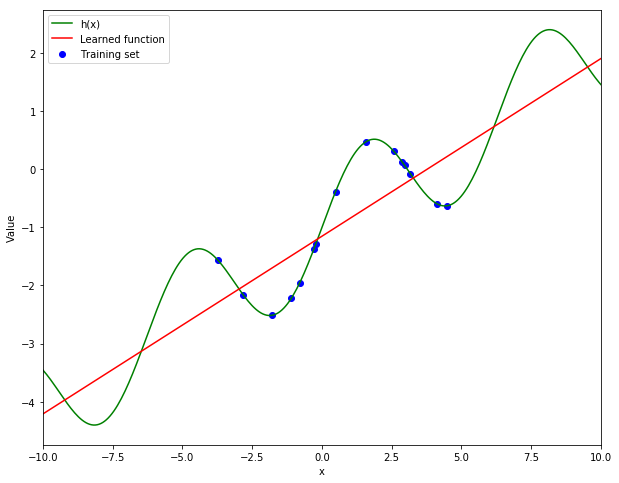

In [142]:
fig, ax = plt.subplots(figsize = (10, 8))

x_points = np.linspace(-10, 10, 300).reshape(300,1)

ax.scatter(data_x, data_h, c = 'b', label = 'Training set')
ax.plot(x_points, h(x_points), c = 'g', label = 'h(x)')
ax.plot(x_points, Reg.predict(x_points), c = 'r', label = 'Learned function')
ax.set_xlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('Value')
ax.legend()
plt.show()
plt.close()

2.4 Comparaison de l'effet de $\lambda$

In [88]:
Reg_null_lambda = Regression_gradient(Lambda = 0, maxiter=50)
Reg_null_lambda.train(data_x,data_h)
Reg_small_lambda = Regression_gradient(Lambda = 0.5, maxiter=50)
Reg_small_lambda.train(data_x,data_h)
Reg_medium_lambda = Regression_gradient(Lambda = 1.3, maxiter=50)
Reg_medium_lambda.train(data_x,data_h)
Reg_large_lambda = Regression_gradient(Lambda = 3, maxiter=50)
Reg_large_lambda.train(data_x,data_h)

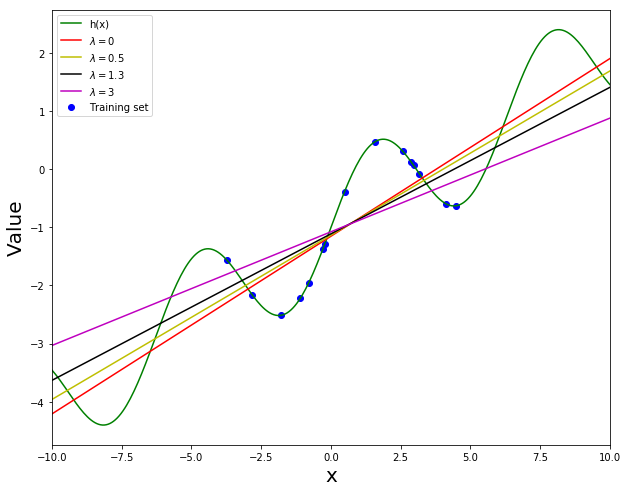

In [115]:
fig, ax = plt.subplots(figsize = (10, 8))

x_points = np.linspace(-10, 10, 300).reshape(300,1)

ax.scatter(data_x, data_h, c = 'b', label = 'Training set')
ax.plot(x_points, h(x_points), c = 'g', label = 'h(x)')
ax.plot(x_points, Reg_null_lambda.predict(x_points), c = 'r', label = '$\lambda = 0$')
ax.plot(x_points, Reg_small_lambda.predict(x_points), c = 'y', label = '$\lambda = 0.5$')
ax.plot(x_points, Reg_medium_lambda.predict(x_points), c = 'k', label = '$\lambda = 1.3$')
ax.plot(x_points, Reg_large_lambda.predict(x_points), c = 'm', label = '$\lambda = 3$')
ax.set_xlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('Value')
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
ax.legend()
plt.show()
plt.close()

2.5 Évolution logarithmique de $\lambda$

In [104]:
data_test = 10 * (np.random.rand(100) - 0.5).reshape(100,1)
targets = h(data_test)
lambda_values = [0.0001, 0.001, 0.01, 0.1, 1., 10., 100.]

In [117]:
quad_loss = []

for Lambda in lambda_values:
    Reg = Regression_gradient(Lambda = Lambda, maxiter=50)
    Reg.train(data_x,data_h)
    predictions = Reg.predict(data_test)
    quad_loss.append(np.mean((predictions - targets)**2))

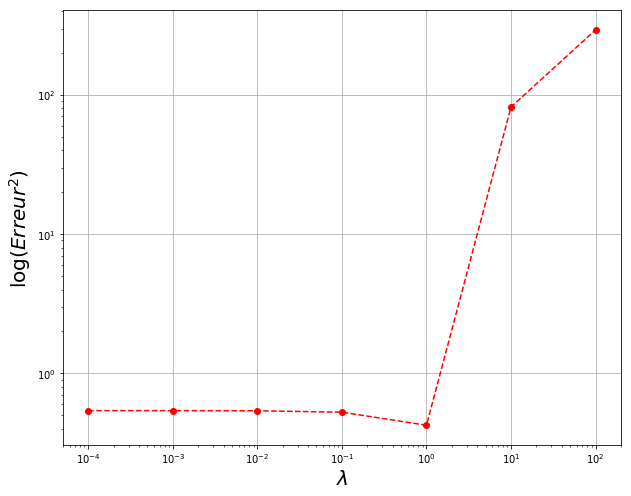

In [118]:
fig, ax = plt.subplots(figsize = (10, 8))

ax.loglog(lambda_values, np.log(quad_loss), 'o--', c = 'r')
ax.set_xlabel('$\lambda$')
ax.set_ylabel('$\log(Erreur^2)$')
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)
ax.grid(True)
plt.show()
plt.close()

L'axe vertical est le log de l'erreur quadratique moyenne, car sinon on perd l'information sur l'erreur pour $\lambda$ entre $10^{-4} \text{ et } 1$. 

2.6

In [161]:
Lambda = 0.01

In [172]:
data_x = np.array([[ 1.57021341 , 2.46557016],
 [ 2.96592574 , 8.79671551],
 [-2.82085445 , 7.95721982]])
data_h = np.array([[ 0.47106385],
 [ 0.06454255],
 [-2.16152354]])
print(data_x)

[[ 1.57021341  2.46557016]
 [ 2.96592574  8.79671551]
 [-2.82085445  7.95721982]]


In [131]:
def phi_transform(x,l):
    transformed_points = np.zeros((x.shape[0],l)).reshape(x.shape[0],l)
    for j in range(x.shape[0]):
        for i in range(l):
            transformed_points[j,i] = x[j]**(i+1)
    return transformed_points

In [177]:
#Reg1 = Regression_gradient(Lambda=Lambda, maxiter = 15)
#Reg1.train(phi_transform(data_x,l = 1), data_h)
#print('######\n#########\n######')
print(data_x)
print(data_h)
Reg2 = Regression_gradient(Lambda=Lambda, maxiter = 15)
Reg2.train(data_x, data_h)
#Reg3 = Regression_gradient(Lambda=Lambda, maxiter = 50)
#Reg3.train(phi_transform(data_x,l = 3), data_h)

[[ 1.57021341  2.46557016]
 [ 2.96592574  8.79671551]
 [-2.82085445  7.95721982]]
[[ 0.47106385]
 [ 0.06454255]
 [-2.16152354]]
Obj= 24.050850990234217
weights= [[0.00301044 0.00018946]]
bias= 0
delta_w= [-4.64604605 10.347303  ]
[[-0.46586969]
 [-0.05394718]
 [ 2.1545391 ]]
delta_b= 1.0898148194549357
Obj= 2845.9039027141166
weights= [[ 0.46761504 -1.03454084]]
bias= -0.10898148194549358
delta_w= [ -3.99288995 -89.99271489]
[[-2.39652294]
 [-7.88717399]
 [-7.4986008 ]]
delta_b= -11.854865153964523
Obj= 228735.00246146883
weights= [[0.86690404 7.96473065]]
bias= 1.076505033450959
delta_w= [ 47.57747234 807.97777936]
[[21.60426775]
 [73.64660512]
 [64.16973104]]
delta_b= 106.28040261076428
Obj= 18494811.312766373
weights= [[ -3.89084319 -72.83304729]]
bias= -9.55153522762547
delta_w= [ -430.46763274 -7259.90968239]
[[-195.70704129]
 [-661.84762647]
 [-575.96307677]]
delta_b= -955.6784963510235
Obj= 1493102720.966035
weights= [[ 39.15592008 653.15792095]]
bias= 86.01631440747688
delta_w=

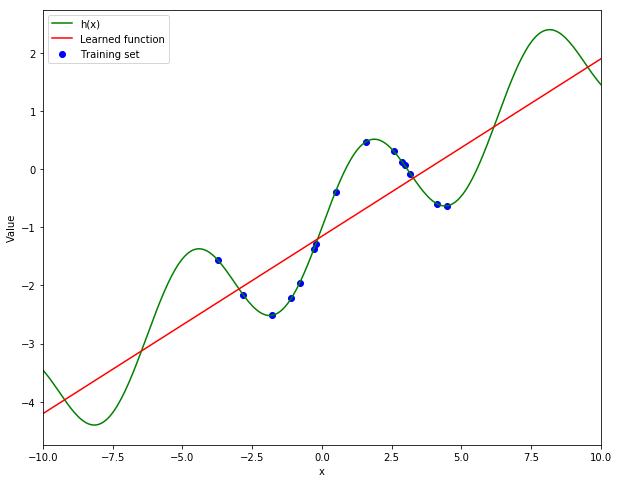

In [154]:
fig,ax = plt.subplots(figsize = (10,8))

ax.scatter(data_x, data_h, c = 'b', label = 'Training set')
ax.plot(x_points, h(x_points), c = 'g', label = 'h(x)')
ax.plot(x_points, Reg1.predict(x_points), c = 'r', label = 'Learned function')
#ax.plot(x_points, Reg2.predict(x_points), c = 'r', label = 'Learned function')
#ax.plot(x_points, Reg3.predict(x_points), c = 'r', label = 'Learned function')
ax.set_xlim(-10, 10)
ax.set_xlabel('x')
ax.set_ylabel('Value')
ax.legend()
plt.show()
plt.close()